In [33]:
# TSSP method for the 1d dimensionless GPE with harmonic potential with periodic boundary conditions on [0,1]

import numpy as np

def TSSP_1d(eps,k,f0,M,dt,N):
    # k : kappa ; f0 : function at t=0
    
    psi = np.empty((N,M),dtype=complex) # lines <-> time, columns <-> space
    
    x = np.linspace(0,1,M,endpoint=False)
    t = np.linspace(0,N*dt,N,endpoint=False)
    mu = np.array([2*np.pi*l for l in range(M)])
    
    psi[0,:] = f0(x)
    
    for n in range(N-1):
        psin = psi[n,:]
        
        psi1 = np.exp(-1j*(x**2/2+k*np.abs(psin)**2)*dt/(2*eps))*psin
        
        psi2 = np.fft.ifft( np.exp(-1j*eps*dt*mu**2/2) * np.fft.fft(psi1) )
        
        psi[n+1,:] = np.exp(-1j*(x**2/2+k*np.abs(psi2)**2)*dt/(2*eps))*psi2
        
    return t, x, psi



In [47]:
eps, k = 1/6**2, 2/6**5
M, dt = 126, 1e-4
N = int(10/dt)

f0 = lambda x: np.exp(-(x-1/2)**2/(2*eps))/((np.pi*eps)**(1/4))+0*1j

t, x, psi = TSSP_1d(eps,k,f0,M,dt,N)

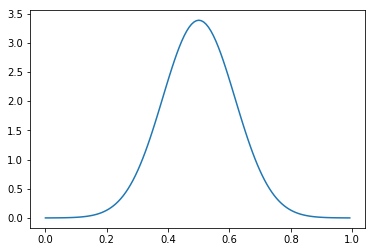

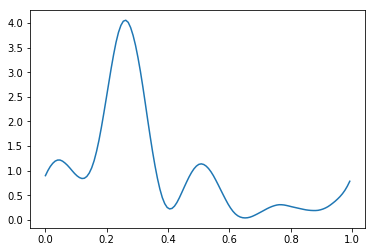

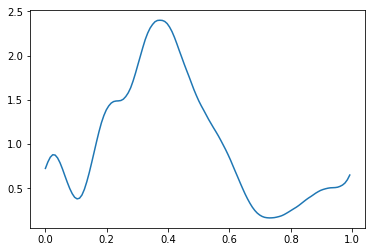

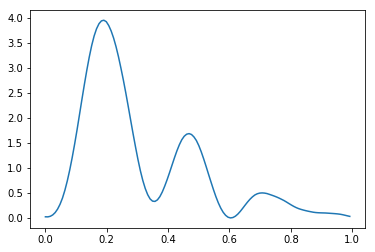

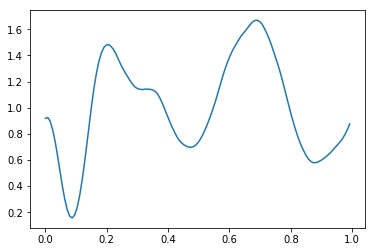

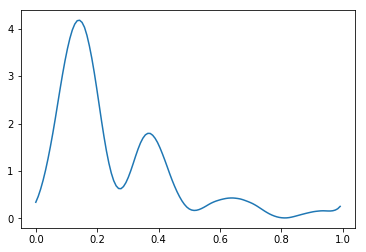

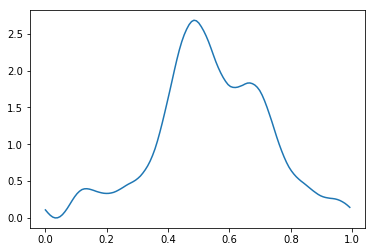

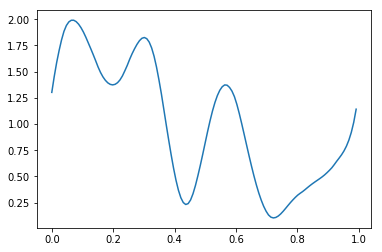

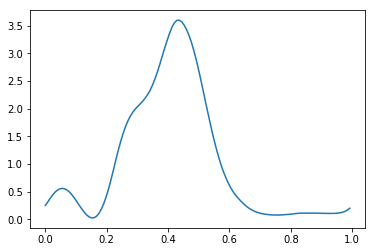

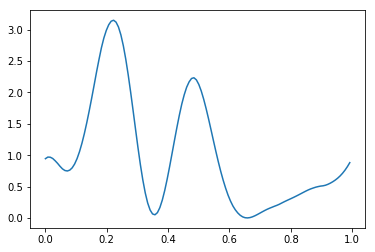

In [48]:
import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D

for n in [int(q*N/10) for q in range(10)]:
    plt.figure()
    plt.plot(x, np.abs(psi[n,:])**2)

In [32]:
print(np.exp(1j+3))

(10.852261914197959+16.901396535150095j)
